# AI Final Project

Made By: Harsh Tiwari

Done Under: Niel Bruce

This is final project for CIS*6020 which is a **Beverage Recommendation System**. This project will help in deciding what would they have depending on  the alcohol, or on what others are drinking.  This is a Collaborative filtering based approach in which you will get recommended what others will drink in a bar or club or cafes.

# Importing Relevant Libraries and Dataset

Importing relevant Libraries for our project

In [1]:
import numpy as np # for mathematical Calculations
import pandas as pd # for data analysis and data Manipulations
import matplotlib.pyplot as plt # for Data visualizations
import seaborn as sns # for advanced plotting
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from kerastuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import json

Importing the dataset. Our dataset is in the form of a raw csv file and stored in a GitHub Repository.

In [2]:
url = "https://raw.githubusercontent.com/HarshTiwari1710/Sobershot/refs/heads/main/mr-boston-flattened.csv"

In [3]:
drinks_df = pd.read_csv(url)

In [4]:
drinks_df

,name,category,measurement-1,ingredient-1,measurement-2,ingredient-2,measurement-3,ingredient-3,measurement-4,ingredient-4,measurement-5,ingredient-5,measurement-6,ingredient-6,instructions,glass,glass-size,Image
0,Gauguin,Cocktail Classics,2 oz,Light Rum,1 oz,Passion Fruit Syrup,1 oz,Lemon Juice,1 oz,Lime Juice,NaN,NaN,NaN,NaN,Combine ingredients with a cup of crushed ice ...,Old-Fashioned Glass,6 to 8 ounces,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,Fort Lauderdale,Cocktail Classics,1 1/2 oz,Light Rum,1/2 oz,Sweet Vermouth,1/4 oz,Juice of Orange,1/4 oz,Juice of a Lime,NaN,NaN,NaN,NaN,Shake with ice and strain into old-fashioned g...,Old-Fashioned Glass,6 to 8 ounces,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,Apple Pie,Cordials and Liqueurs,3 oz,Apple schnapps,1 oz,Cinnamon schnapps,NaN,Apple slice,NaN,NaN,NaN,NaN,NaN,NaN,Pour into ice-filled old-fashioned glass. Garn...,Old-Fashioned Glass,6 to 8 ounces,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,Cuban Cocktail No. 1,Cocktail Classics,1/2 oz,Juice of a Lime,1/2 oz,Powdered Sugar,2 oz,Light Rum,NaN,NaN,NaN,NaN,NaN,NaN,Shake with ice and strain into cocktail glass.,Cocktail Glass,6 or more ounces,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,Cool Carlos,Cocktail Classics,1 1/2 oz,Dark rum,2 oz,Cranberry Juice,2 oz,Pineapple Juice,1 oz,Orange curacao,1 oz,Sour Mix,NaN,NaN,"Mix all ingredients except curacao with ice, s...",Collins Glass,14 to 16 ounces,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Wallis Blue Cocktail,Gin,1,"Lime wedge, superfine sugar",1 oz,Gin,1 oz,Triple Sec,1 oz,Fresh Lime Juice,NaN,NaN,NaN,NaN,Rim old-fashioned glass with lime and sugar. F...,Old-Fashioned Glass,6 to 8 ounces,https://encrypted-tbn0.gstatic.com/images?q=tb...
986,Minnehaha Cocktail,Cocktail Classics,1/4 oz,Juice of Orange,1/2 oz,Dry Vermouth,1/2 oz,Sweet Vermouth,1 oz,Old Mr. Boston Dry Gin,NaN,NaN,NaN,NaN,Shake well with cracked ice and strain into 4 ...,Cocktail Glass,6 or more ounces,https://encrypted-tbn0.gstatic.com/images?q=tb...
987,Wallick Cocktail,Gin,1 1/2 oz,Gin,1 1/2 oz,Dry Vermouth,1 oz,Triple Sec,NaN,NaN,NaN,NaN,NaN,NaN,Stir with ice and strain into chilled cocktail...,Cocktail Glass,6 or more ounces,https://encrypted-tbn0.gstatic.com/images?q=tb...
988,Waikiki Beachcomber,Gin,3/4 oz,Gin,3/4 oz,Triple Sec,1/2 oz,Pineapple Juice,NaN,NaN,NaN,NaN,NaN,NaN,Shake with ice and strain into chilled cocktai...,Cocktail Glass,6 or more ounces,https://encrypted-tbn0.gstatic.com/images?q=tb...


# Data Exploration and EDA

Checking the count of null values in each column

In [5]:
drinks_df.isnull().sum()

name               0
category           0
measurement-1     10
ingredient-1       1
measurement-2     35
ingredient-2       3
measurement-3    143
ingredient-3      96
measurement-4    390
ingredient-4     406
measurement-5    683
ingredient-5     669
measurement-6    919
ingredient-6     831
instructions       0
glass              5
glass-size        11
Image              0
dtype: int64

Using describe, checking count, unique, top and frequency of values in the dataset.

In [6]:
drinks_df.describe()

,name,category,measurement-1,ingredient-1,measurement-2,ingredient-2,measurement-3,ingredient-3,measurement-4,ingredient-4,measurement-5,ingredient-5,measurement-6,ingredient-6,instructions,glass,glass-size,Image
count,990,990,980,989,955,987,847,894,600,584,307,321,71,159,990,985,979,990
unique,990,11,33,237,19,256,22,227,47,173,44,144,12,117,580,20,16,795
top,Gauguin,Cocktail Classics,1 1/2 oz,Vodka,1 oz,Dry Vermouth,1/2 oz,Fresh lemon juice,1 oz,Fresh lemon juice,1 oz,Angostura Bitters,1 oz,Lemon twist,Shake with ice and strain into cocktail glass.,Cocktail Glass,6 or more ounces,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
freq,1,468,289,95,291,63,267,57,195,33,101,24,32,7,115,542,542,76


In [7]:
drinks_df.columns

Index(['name', 'category', 'measurement-1', 'ingredient-1', 'measurement-2',
       'ingredient-2', 'measurement-3', 'ingredient-3', 'measurement-4',
       'ingredient-4', 'measurement-5', 'ingredient-5', 'measurement-6',
       'ingredient-6', 'instructions', 'glass', 'glass-size', 'Image'],
      dtype='object')

Plotting a graph for missing values in the dataset

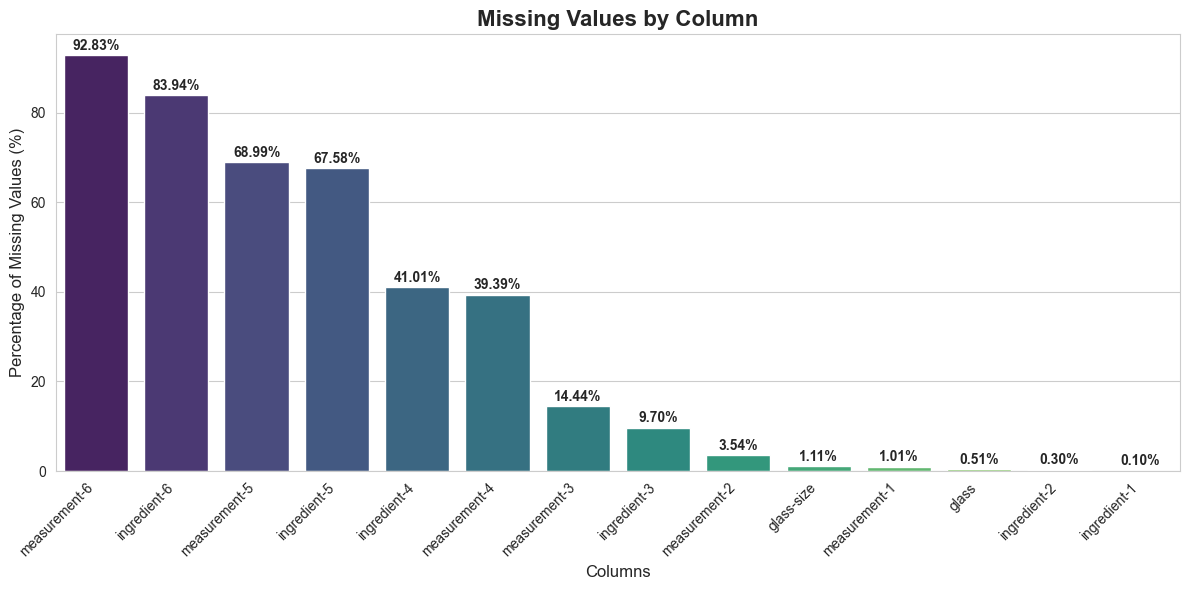


Missing Values Summary:
               Total Missing  Percent Missing (%)
measurement-1             10                 1.01
ingredient-1               1                 0.10
measurement-2             35                 3.54
ingredient-2               3                 0.30
measurement-3            143                14.44
ingredient-3              96                 9.70
measurement-4            390                39.39
ingredient-4             406                41.01
measurement-5            683                68.99
ingredient-5             669                67.58
measurement-6            919                92.83
ingredient-6             831                83.94
glass                      5                 0.51
glass-size                11                 1.11


In [8]:
def plot_missing_values_bar(drinks_df, figsize=(12, 6)):
    # Calculate missing values percentage
    missing_percentages = drinks_df.isnull().mean() * 100
    missing_percentages = missing_percentages[missing_percentages > 0].sort_values(ascending=False)
    
    # Create the plot with a professional style
    plt.figure(figsize=figsize)
    
    # Use seaborn for a more polished look
    sns.set_style("whitegrid")
    
    # Create bar plot with custom color palette
    ax = sns.barplot(
        x=missing_percentages.index, 
        y=missing_percentages.values, 
        palette='viridis'
    )
    
    # Customize the plot
    plt.title('Missing Values by Column', fontsize=16, fontweight='bold')
    plt.xlabel('Columns', fontsize=12)
    plt.ylabel('Percentage of Missing Values (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    # Add value labels on top of each bar
    for i, v in enumerate(missing_percentages.values):
        ax.text(
            i, 
            v + 0.5, 
            f'{v:.2f}%', 
            ha='center', 
            va='bottom',
            fontweight='bold'
        )
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
    # Print summary of missing values
    missing_summary = pd.DataFrame({
        'Total Missing': drinks_df.isnull().sum(),
        'Percent Missing (%)': drinks_df.isnull().mean() * 100
    })
    print("\nMissing Values Summary:")
    print(missing_summary[missing_summary['Total Missing'] > 0].round(2))

# Example usage
plot_missing_values_bar(drinks_df)

# Feature Engineering

Combining all the ingredients in a dictionary so as when we will create UI and fetch it in the frontend and show this it will be easily accessible

In [9]:
def combine_ingredients_to_dict(row, num_pairs=6):
    ingredients_dict = {}
    for i in range(1, num_pairs + 1):
        ingredient_col = f'ingredient-{i}'
        measurement_col = f'measurement-{i}'
        if ingredient_col in row:
            ingredient = row[ingredient_col]
            measurement = row.get(measurement_col, "1 oz")  # Default to "1 oz" if measurement is missing
            if pd.notna(ingredient):
                if pd.isna(measurement):
                    measurement = "1 oz"  # Assign "1 oz" if the measurement is NaN
                ingredients_dict[ingredient] = measurement
    return ingredients_dict

# Apply the function to each row to create a new column for the ingredient-measurement dictionary
drinks_df['ingredient_dict'] = drinks_df.apply(combine_ingredients_to_dict, axis=1)

# Drop the original ingredient and measurement columns
for i in range(1, 7):
    drinks_df.drop([f'ingredient-{i}', f'measurement-{i}'], axis=1, inplace=True)



In [10]:
drinks_df

,name,category,instructions,glass,glass-size,Image,ingredient_dict
0,Gauguin,Cocktail Classics,Combine ingredients with a cup of crushed ice ...,Old-Fashioned Glass,6 to 8 ounces,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","{' Light Rum': '2 oz', ' Passion Fruit Syrup':..."
1,Fort Lauderdale,Cocktail Classics,Shake with ice and strain into old-fashioned g...,Old-Fashioned Glass,6 to 8 ounces,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","{' Light Rum': '1 1/2 oz', ' Sweet Vermouth': ..."
2,Apple Pie,Cordials and Liqueurs,Pour into ice-filled old-fashioned glass. Garn...,Old-Fashioned Glass,6 to 8 ounces,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","{' Apple schnapps': '3 oz', ' Cinnamon schnapp..."
3,Cuban Cocktail No. 1,Cocktail Classics,Shake with ice and strain into cocktail glass.,Cocktail Glass,6 or more ounces,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","{' Juice of a Lime': '1/2 oz', ' Powdered Suga..."
4,Cool Carlos,Cocktail Classics,"Mix all ingredients except curacao with ice, s...",Collins Glass,14 to 16 ounces,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","{' Dark rum': '1 1/2 oz', ' Cranberry Juice': ..."
...,...,...,...,...,...,...,...
985,Wallis Blue Cocktail,Gin,Rim old-fashioned glass with lime and sugar. F...,Old-Fashioned Glass,6 to 8 ounces,https://encrypted-tbn0.gstatic.com/images?q=tb...,"{'Lime wedge, superfine sugar': '1', ' Gin': '..."
986,Minnehaha Cocktail,Cocktail Classics,Shake well with cracked ice and strain into 4 ...,Cocktail Glass,6 or more ounces,https://encrypted-tbn0.gstatic.com/images?q=tb...,"{' Juice of Orange': '1/4 oz', ' Dry Vermouth'..."
987,Wallick Cocktail,Gin,Stir with ice and strain into chilled cocktail...,Cocktail Glass,6 or more ounces,https://encrypted-tbn0.gstatic.com/images?q=tb...,"{' Gin': '1 1/2 oz', ' Dry Vermouth': '1 1/2 o..."
988,Waikiki Beachcomber,Gin,Shake with ice and strain into chilled cocktai...,Cocktail Glass,6 or more ounces,https://encrypted-tbn0.gstatic.com/images?q=tb...,"{' Gin': '3/4 oz', ' Triple Sec': '3/4 oz', ' ..."


Re checking and removal of missing values if any

In [11]:
drinks_df.isnull().sum()

name                0
category            0
instructions        0
glass               5
glass-size         11
Image               0
ingredient_dict     0
dtype: int64

As glass size is a categorical column we will impute missing columns with Mode of the dataset

In [12]:
mode_glass_size = drinks_df['glass-size'].mode()[0]  # The mode() method returns a Series, take the first element

# Fill missing values in 'glass-size' with the mode
drinks_df['glass-size'].fillna(mode_glass_size, inplace=True)

Handling missing values of glass. Checking how many missing values are there. Since most of them are of a Martini. I am imputing it with the Martini Glass.

In [13]:
missing_glass = drinks_df[drinks_df['glass'].isnull()]

In [14]:
missing_glass

,name,category,instructions,glass,glass-size,Image,ingredient_dict
53,Martini (Medium),Cocktail Classics,Follow directions for Martini preparation.,NaN,6 or more ounces,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...","{' Gin': '1 1/2 oz', ' Dry Vermouth': '1/2 oz'..."
54,Martini (Dry) (5-to-1),Cocktail Classics,Follow directions for Martini preparation.,NaN,6 or more ounces,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...","{' Gin': '1 2/3 oz', ' Dry Vermouth': '1/3 oz'}"
255,Dry Martini,Cocktail Classics,serve with an olive.,NaN,6 or more ounces,https://encrypted-tbn0.gstatic.com/images?q=tb...,"{' Mr. Boston Gin': '1 2/3 oz', ' Dry Vermouth..."
258,Dillatini Cocktail,Cocktail Classics,Serve with a dilly bean.,NaN,6 or more ounces,https://encrypted-tbn0.gstatic.com/images?q=tb...,"{' Mr. Boston Gin': '1 1/2 oz', ' Dry Vermouth..."
437,Vodka Martini,Cocktail Classics,serve with an olive.,NaN,6 or more ounces,https://encrypted-tbn0.gstatic.com/images?q=tb...,"{' Mr. Boston Vodka': '1 1/2 oz', ' Dry Vermou..."


In [15]:
drinks_df['glass'].fillna('Martini Glass', inplace=True)

In [16]:
drinks_df.isnull().sum()

name               0
category           0
instructions       0
glass              0
glass-size         0
Image              0
ingredient_dict    0
dtype: int64

In [17]:
drinks_df

,name,category,instructions,glass,glass-size,Image,ingredient_dict
0,Gauguin,Cocktail Classics,Combine ingredients with a cup of crushed ice ...,Old-Fashioned Glass,6 to 8 ounces,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","{' Light Rum': '2 oz', ' Passion Fruit Syrup':..."
1,Fort Lauderdale,Cocktail Classics,Shake with ice and strain into old-fashioned g...,Old-Fashioned Glass,6 to 8 ounces,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","{' Light Rum': '1 1/2 oz', ' Sweet Vermouth': ..."
2,Apple Pie,Cordials and Liqueurs,Pour into ice-filled old-fashioned glass. Garn...,Old-Fashioned Glass,6 to 8 ounces,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","{' Apple schnapps': '3 oz', ' Cinnamon schnapp..."
3,Cuban Cocktail No. 1,Cocktail Classics,Shake with ice and strain into cocktail glass.,Cocktail Glass,6 or more ounces,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","{' Juice of a Lime': '1/2 oz', ' Powdered Suga..."
4,Cool Carlos,Cocktail Classics,"Mix all ingredients except curacao with ice, s...",Collins Glass,14 to 16 ounces,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","{' Dark rum': '1 1/2 oz', ' Cranberry Juice': ..."
...,...,...,...,...,...,...,...
985,Wallis Blue Cocktail,Gin,Rim old-fashioned glass with lime and sugar. F...,Old-Fashioned Glass,6 to 8 ounces,https://encrypted-tbn0.gstatic.com/images?q=tb...,"{'Lime wedge, superfine sugar': '1', ' Gin': '..."
986,Minnehaha Cocktail,Cocktail Classics,Shake well with cracked ice and strain into 4 ...,Cocktail Glass,6 or more ounces,https://encrypted-tbn0.gstatic.com/images?q=tb...,"{' Juice of Orange': '1/4 oz', ' Dry Vermouth'..."
987,Wallick Cocktail,Gin,Stir with ice and strain into chilled cocktail...,Cocktail Glass,6 or more ounces,https://encrypted-tbn0.gstatic.com/images?q=tb...,"{' Gin': '1 1/2 oz', ' Dry Vermouth': '1 1/2 o..."
988,Waikiki Beachcomber,Gin,Shake with ice and strain into chilled cocktai...,Cocktail Glass,6 or more ounces,https://encrypted-tbn0.gstatic.com/images?q=tb...,"{' Gin': '3/4 oz', ' Triple Sec': '3/4 oz', ' ..."


### ENCODING FOR MODELING

I am using Label Encoder for encoding category of cocktails and One Hot Encoder for Glass type. I am not encoding whole dataset because of More encoding can increase the number of Features which can lead to overfitting issue.

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [19]:
drinks_df['category'].unique()

array(['Cocktail Classics', 'Cordials and Liqueurs', 'Whiskies', 'Brandy',
       'Vodka', 'Non-alcoholic Drinks', 'Rum - Daiquiris', 'Rum',
       'Tequila', 'Shooters', 'Gin'], dtype=object)

In [20]:
drinks_df['glass'].unique()

array(['Old-Fashioned Glass', 'Cocktail Glass', 'Collins Glass',
       'Champagne Flute', 'Cordial or Pony Glass', 'Highball Glass',
       'Irish Coffee Glass', 'Martini Glass', 'Beer Mug', 'Sour Glass',
       'Brandy Snifter', 'Stem Glass', 'Red-Wine Glass', 'Mug',
       'Shot Glass', 'Stein', 'Sherry Glass', 'Punch Cup',
       'Hurricane Glass', 'Pousse-Cafe_ Glass', 'White-Wine Glass'],
      dtype=object)

In [21]:
data = {
    'category': ['Cocktail Classics', 'Cordials and Liqueurs', 'Whiskies', 'Brandy',
       'Vodka', 'Non-alcoholic Drinks', 'Rum - Daiquiris', 'Rum',
       'Tequila', 'Shooters', 'Gin'],
    'glass': ['Old-Fashioned Glass', 'Cocktail Glass', 'Collins Glass',
       'Champagne Flute', 'Cordial or Pony Glass', 'Highball Glass',
       'Irish Coffee Glass', 'Martini Glass', 'Beer Mug', 'Sour Glass',
       'Brandy Snifter', 'Stem Glass', 'Red-Wine Glass', 'Mug',
       'Shot Glass', 'Stein', 'Sherry Glass', 'Punch Cup',
       'Hurricane Glass', 'Pousse-Cafe_ Glass', 'White-Wine Glass']
}

# Label Encoding for ordinal categories
label_encoder = LabelEncoder()
drinks_df['category_label'] = label_encoder.fit_transform(drinks_df['category'])

# One-Hot Encoding for nominal categories
one_hot_encoded = pd.get_dummies(drinks_df['glass'], prefix='glass')
drinks_df = pd.concat([drinks_df, one_hot_encoded], axis=1)

In [22]:
drinks_df

,name,category,instructions,glass,glass-size,Image,ingredient_dict,category_label,glass_Beer Mug,glass_Brandy Snifter,...,glass_Old-Fashioned Glass,glass_Pousse-Cafe_ Glass,glass_Punch Cup,glass_Red-Wine Glass,glass_Sherry Glass,glass_Shot Glass,glass_Sour Glass,glass_Stein,glass_Stem Glass,glass_White-Wine Glass
0,Gauguin,Cocktail Classics,Combine ingredients with a cup of crushed ice ...,Old-Fashioned Glass,6 to 8 ounces,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","{' Light Rum': '2 oz', ' Passion Fruit Syrup':...",1,False,False,...,True,False,False,False,False,False,False,False,False,False
1,Fort Lauderdale,Cocktail Classics,Shake with ice and strain into old-fashioned g...,Old-Fashioned Glass,6 to 8 ounces,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","{' Light Rum': '1 1/2 oz', ' Sweet Vermouth': ...",1,False,False,...,True,False,False,False,False,False,False,False,False,False
2,Apple Pie,Cordials and Liqueurs,Pour into ice-filled old-fashioned glass. Garn...,Old-Fashioned Glass,6 to 8 ounces,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","{' Apple schnapps': '3 oz', ' Cinnamon schnapp...",2,False,False,...,True,False,False,False,False,False,False,False,False,False
3,Cuban Cocktail No. 1,Cocktail Classics,Shake with ice and strain into cocktail glass.,Cocktail Glass,6 or more ounces,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","{' Juice of a Lime': '1/2 oz', ' Powdered Suga...",1,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Cool Carlos,Cocktail Classics,"Mix all ingredients except curacao with ice, s...",Collins Glass,14 to 16 ounces,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","{' Dark rum': '1 1/2 oz', ' Cranberry Juice': ...",1,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Wallis Blue Cocktail,Gin,Rim old-fashioned glass with lime and sugar. F...,Old-Fashioned Glass,6 to 8 ounces,https://encrypted-tbn0.gstatic.com/images?q=tb...,"{'Lime wedge, superfine sugar': '1', ' Gin': '...",3,False,False,...,True,False,False,False,False,False,False,False,False,False
986,Minnehaha Cocktail,Cocktail Classics,Shake well with cracked ice and strain into 4 ...,Cocktail Glass,6 or more ounces,https://encrypted-tbn0.gstatic.com/images?q=tb...,"{' Juice of Orange': '1/4 oz', ' Dry Vermouth'...",1,False,False,...,False,False,False,False,False,False,False,False,False,False
987,Wallick Cocktail,Gin,Stir with ice and strain into chilled cocktail...,Cocktail Glass,6 or more ounces,https://encrypted-tbn0.gstatic.com/images?q=tb...,"{' Gin': '1 1/2 oz', ' Dry Vermouth': '1 1/2 o...",3,False,False,...,False,False,False,False,False,False,False,False,False,False
988,Waikiki Beachcomber,Gin,Shake with ice and strain into chilled cocktai...,Cocktail Glass,6 or more ounces,https://encrypted-tbn0.gstatic.com/images?q=tb...,"{' Gin': '3/4 oz', ' Triple Sec': '3/4 oz', ' ...",3,False,False,...,False,False,False,False,False,False,False,False,False,False


Converting the ingredients dictionary to string because of ease in modelling. I am also vectorizing all ingredients to recommend similarity based recommendations.

In [23]:
def dict_to_string(ingredient_dict):
    return " ".join([f"{key}:{value}" for key, value in ingredient_dict.items()])

def dict_to_string(ingredient_dict):
    return " ".join([f"{key}:{value}" for key, value in ingredient_dict.items()])

# Apply the function to create a new text column
drinks_df['ingredients_text'] = drinks_df['ingredient_dict'].apply(dict_to_string)

# Use the 'ingredients_text' column for vectorization
vectorizer_ingredients = TfidfVectorizer(stop_words='english')
vectorized_ingredients = vectorizer_ingredients.fit_transform(drinks_df['ingredients_text']).toarray()

# Check the shape of the vectorized ingredients
print(f"Shape of vectorized ingredients: {vectorized_ingredients.shape}")

Shape of vectorized ingredients: (990, 458)


Combining the Encoded features One hot, Label Encoded Features  and Vectorized Ingredients

In [24]:
encoded_features = np.hstack([
    drinks_df[['category_label']].values,  # Label-encoded category
    drinks_df.filter(like='glass_').values,  # One-hot encoded glass
    vectorized_ingredients  # TF-IDF vectorized ingredients
])

# MODELING

### Data Preprocessing and Scaling

I am using Standard Scaler for feature normalization and scaling encoded features.

In [25]:
scaler = StandardScaler()
normalized_features = scaler.fit_transform(encoded_features)

In [26]:
X = normalized_features

Splitting the data into training and testing, where 80% is training and 20% is testing data.

In [27]:
X_train, X_test, indices_train, indices_test = train_test_split(
    X, drinks_df.index, test_size=0.2, random_state=42
)

Applying PCA for dimensionality reduction because after encoding the number features become very high (Curse of Dimensionality) leading to overfitting. So to prevent this we do PCA and reduce the dimensionality of the data.

In [28]:
# Fit PCA on the training data
pca = PCA(n_components=10)  # Specify the number of components to retain
pca.fit(X_train)

# Transform the training and test data
X_reduced_train = pca.transform(X_train)
X_reduced_test = pca.transform(X_test)

print(X_reduced_train.shape)  # Should be (792, 10)
print(X_reduced_test.shape) 

(792, 10)
(198, 10)


### Building the Modelling

### Neural Network

A computational model inspired by the human brain. It consists of layers of interconnected nodes (neurons) designed to recognize patterns in data.

**Key Components of a Neural Network:**

- Input Layer: Takes the raw input data.
- Hidden Layer: Performs Computations and extract patterns,
- Output Layer: Produces te final Output based on the problem.
- Activation Function: Non-Linear Functions that allow network to learn Complex Relationships.

In [29]:
model = Sequential([
    Dense(256, activation='relu', kernel_regularizer=l2(0.01),input_shape=(10,)),
    Dropout(0.4),
    BatchNormalization(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01),input_shape=(10,)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01),input_shape=(10,)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01),input_shape=(10,)),
    Dropout(0.1),
    BatchNormalization(),
    Dense(10, activation='sigmoid')
])

Training the model over the training data and used early stopping from preventing loss and time.

In [30]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Stop if no improvement after 10 epochs
    restore_best_weights=True  # Restore model weights from the epoch with the best loss
)

In [31]:
model.compile(optimizer=Adam(learning_rate=0.005), loss='mse', metrics=['mae'])
model_nn = model.fit(
    X_reduced_train, X_reduced_train,  # Autoencoder: input equals output
    validation_split=0.2,
    epochs=100,
    batch_size=50,
    callbacks=[early_stopping]
)
reconstruction_loss = model.evaluate( X_reduced_test,X_reduced_test)
print(f"Reconstruction Loss on Test Data: {reconstruction_loss}")


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 7.4952 - mae: 0.8857 - val_loss: 8.4358 - val_mae: 0.9609
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.8562 - mae: 0.8365 - val_loss: 7.7567 - val_mae: 0.9410
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.6396 - mae: 0.7700 - val_loss: 7.3455 - val_mae: 0.9118
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.4517 - mae: 0.7264 - val_loss: 7.1177 - val_mae: 0.8844
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.9955 - mae: 0.7983 - val_loss: 6.9851 - val_mae: 0.8642
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.5307 - mae: 0.6971 - val_loss: 6.9053 - val_mae: 0.8580
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.5830 - mae: 0.6481 - val_loss: 6.8339 - val_mae: 0.8435
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.9869 - mae: 0.6446 - val_loss: 6.8491 - val_mae: 0.8483
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.29

Plotting a graph of Training vs validation loss and plotting optimal epoch where the loss is lowest.

In [32]:
def find_optimal_epoch(history):
    """
    Find the epoch with the lowest validation loss
    """
    val_losses = history.history['val_loss']
    optimal_epoch = np.argmin(val_losses)
    return optimal_epoch, val_losses[optimal_epoch]

optimal_epoch, optimal_loss = find_optimal_epoch(model_nn)

In [33]:
from tensorflow.keras.losses import MeanSquaredError

# Compile the model with full loss function reference
model.compile(optimizer=Adam(learning_rate=0.005), loss=MeanSquaredError(), metrics=['mae'])

# Save the model
model.save("beverage_recommendation_model.h5")

In [34]:
import pickle

# Save the processed DataFrame to a .pkl file
with open("drinks_df.pkl", "wb") as file:
    pickle.dump(drinks_df, file)

In [35]:
feature_matrix = np.vstack([X_reduced_train, X_reduced_test])  # Combine training and test data
np.save("feature_matrix.npy", feature_matrix)

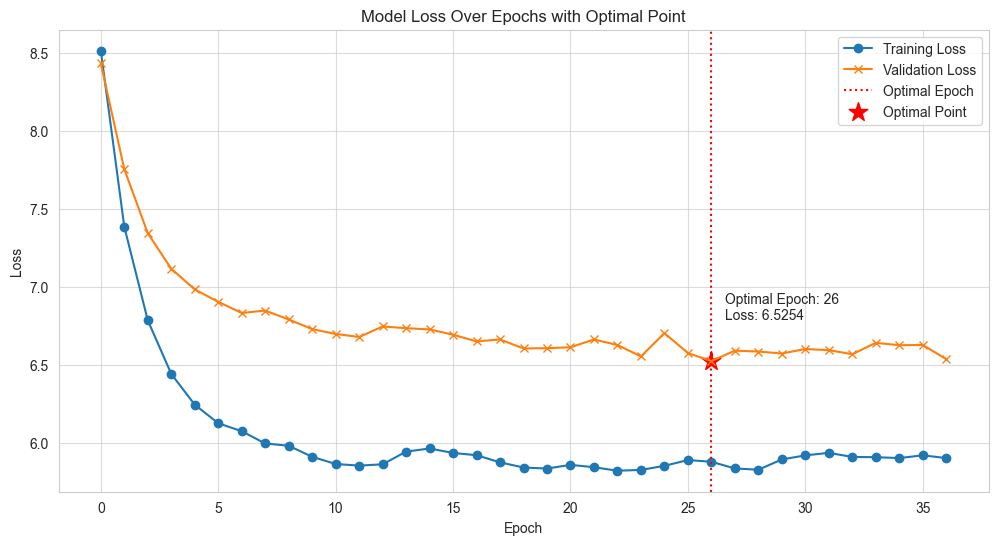

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(model_nn.history['loss'], label='Training Loss', marker='o')
plt.plot(model_nn.history['val_loss'], label='Validation Loss', marker='x')

# Find the optimal epoch
val_losses = model_nn.history['val_loss']
optimal_epoch = np.argmin(val_losses)
optimal_loss = val_losses[optimal_epoch]

# Add a vertical dotted line at the optimal point
plt.axvline(x=optimal_epoch, color='r', linestyle=':', label='Optimal Epoch')

# Highlight the optimal point
plt.scatter(
    optimal_epoch, 
    optimal_loss, 
    color='red', 
    s=200, 
    label='Optimal Point', 
    marker='*'
)

plt.title("Model Loss Over Epochs with Optimal Point")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(alpha=0.7)
plt.annotate(
    f'Optimal Epoch: {optimal_epoch}\nLoss: {optimal_loss:.4f}', 
    xy=(optimal_epoch, optimal_loss),
    xytext=(10, 30),
    textcoords='offset points',
    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2')
)
plt.show()

Creating a function of recommendations and receiving recommendations from the model.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Recommendations in JSON Format:
[
    {
        "name": "Cuban Cocktail No. 1",
        "category": "Cocktail Classics",
        "ingredients": {
            " Juice of a Lime": "1/2 oz",
            " Powdered Sugar": "1/2 oz",
            " Light Rum": "2 oz"
        },
        "glass": "Cocktail Glass",
        "instructions": "Shake with ice and  strain into cocktail glass.",
        "image": ""
    },
    {
        "name": "Cool Carlos",
        "category": "Cocktail Classics",
        "ingredients": {
            " Dark rum": "1 1/2 oz",
            " Cranberry Juice": "2 oz",
            " Pineapple Juice": "2 oz",
            " Orange curacao": "1 oz",
            " Sour Mix": "1 oz"
        },
        "glass": "Collins Glass",
        "instructions": "Mix all ingredients except curacao with ice, shake well. Pour into collins glass and float curacao on top. Garnish with pineapple and orange slices, and a cherry.",
        "image": ""
    },
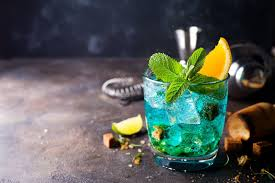
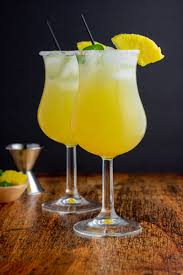
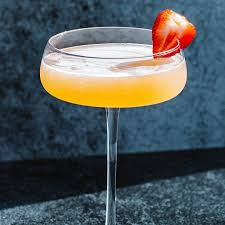
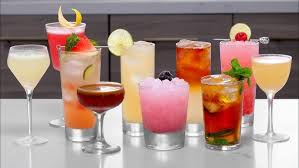
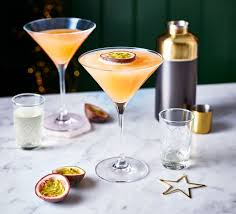
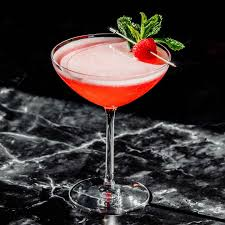
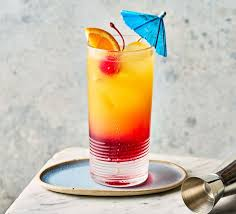
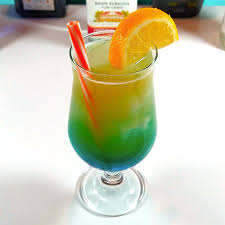
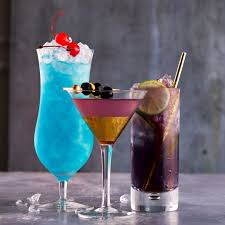

In [37]:
def recommend_drinks(drink_index, model, drinks_df, feature_matrix, top_n=5):
    """
    Recommend similar drinks to a given drink.
    Returns details of recommended drinks in JSON format.

    :param drink_index: Index of the drink to recommend for
    :param model: Trained Keras model
    :param drinks_df: Original DataFrame with drink details
    :param feature_matrix: Processed feature matrix
    :param top_n: Number of recommendations to return
    :return: JSON string with drink recommendations
    """
    # Predict similarities
    similarities = model.predict(feature_matrix)
    drink_similarities = similarities[drink_index]
    
    # Get indices of the most similar drinks (excluding the drink itself)
    similar_indices = np.argsort(-drink_similarities)[1:top_n + 1]
    
    # Fetch details for recommended drinks
    recommended_drinks = drinks_df.iloc[similar_indices]
    recommendations = []
    
    for _, drink in recommended_drinks.iterrows():
        drink_details = {
            "name": drink.get("name"),
            "category": drink.get("category"),
            "ingredients": drink.get("ingredient_dict"),
            "glass": drink.get("glass"),
            "instructions": drink.get("instructions"),
            "image": drink.get("Image")
        }
        recommendations.append(drink_details)
    
    # Convert to JSON
    return json.dumps(recommendations, indent=4)

# Example Usage: Get recommendations for the first drink
drink_index = 0
recommendation_json = recommend_drinks(drink_index, model, drinks_df, X_reduced_test, top_n=10)

# Print JSON result
print("Recommendations in JSON Format:")
print(recommendation_json)